In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
from scipy.optimize import root_scalar
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pcms.haar
import pcms.tree
import utils

In [3]:
DATA = os.environ['DATA']
GN_DATA = os.path.join(DATA, 'guerrero_negro')
GG_DATA = os.path.join(DATA, 'greengenes/gg_13_8_otus')
GG_TREES = os.path.join(GG_DATA, 'trees')
GG_OTU_MAPS = os.path.join(GG_DATA, 'otus')

## Part 1: Verify functionality of CDF estimator

### Random topology CDF

#### Evaluate at a single point

In [43]:
n_leaves = 100
f = np.random.dirichlet(alpha=np.ones((n_leaves,), dtype=float))
g = np.random.dirichlet(alpha=np.ones((n_leaves,), dtype=float))
func = f - g
y = 0.9

In [44]:
cdf_val = pcms.haar.cdf_proj_cbst(y, func, eps=0.01, delta=0.01)

In [45]:
print(cdf_val)

0.9072948387589522


#### Evaluate at multiple points

In [61]:
quant50 = root_scalar(lambda x: pcms.haar.cdf_proj_cbst(x, func, eps=0.01, delta=0.01) - 0.5, bracket=(-1.5,1.5), method='bisect', xtol=1e-3)
quant80 = root_scalar(lambda x: pcms.haar.cdf_proj_cbst(x, func, eps=0.01, delta=0.01) - 0.8, bracket=(-1.5,1.5), method='bisect', xtol=1e-3)
quant90 = root_scalar(lambda x: pcms.haar.cdf_proj_cbst(x, func, eps=0.01, delta=0.01) - 0.9, bracket=(-1.5,1.5), method='bisect', xtol=1e-3)
quant95 = root_scalar(lambda x: pcms.haar.cdf_proj_cbst(x, func, eps=0.01, delta=0.01) - 0.95, bracket=(-1.5,1.5), method='bisect', xtol=1e-3)

In [62]:
print(quant50.root, quant80.root, quant90.root, quant95.root)

0.065185546875 0.375732421875 0.841552734375 1.477294921875


In [70]:
n_points = 1000
ys = np.linspace(-0.5, 5.0, n_points)

In [71]:
cdf_vals = pcms.haar.cdf_proj_cbst(ys, func, eps=0.01, delta=0.01)

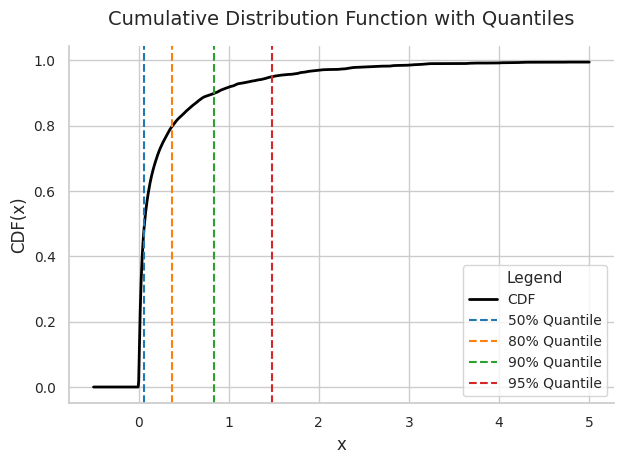

In [72]:
sns.set_theme(style="whitegrid")

# Create high-DPI figure for sharpness
fig, ax = plt.subplots()

# Plot CDF
ax.plot(ys, cdf_vals, label='CDF', color='black', linewidth=2)

# Vertical quantile lines
ax.axvline(quant50.root, linestyle='--', color='#1f77b4', label='50% Quantile')
ax.axvline(quant80.root, linestyle='--', color='#ff7f0e', label='80% Quantile')
ax.axvline(quant90.root, linestyle='--', color='#2ca02c', label='90% Quantile')
ax.axvline(quant95.root, linestyle='--', color='#d62728', label='95% Quantile')

# Labels and title
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("CDF(x)", fontsize=12)
ax.set_title("Cumulative Distribution Function with Quantiles", fontsize=14, pad=15)

ax.tick_params(axis='both', which='major', labelsize=10)
sns.despine()

ax.legend(title="Legend", fontsize=10, title_fontsize=11, loc="lower right", frameon=True)

plt.tight_layout()
plt.show()

### Difference of Dirichlets CDF

#### Evaluate at a single point

In [51]:
n_leaves = 100
tree = pcms.tree.cbst(n_leaves=n_leaves)
y = 0.01
eps = 0.01
delta = 0.01

In [52]:
node = np.random.choice(tree.find_interior_nodes())

In [53]:
cdf_val = pcms.haar.cdf_proj_dirichlet_diff(y, tree, node=node, eps=eps, delta=delta)

In [54]:
print(cdf_val)

0.832868


#### Evaluate at multiple points

In [56]:
quant50 = root_scalar(lambda x: pcms.haar.cdf_proj_dirichlet_diff(x, tree, node=node, eps=eps, delta=delta) - 0.5, bracket=(-1,1), method='bisect', xtol=1e-3)
quant80 = root_scalar(lambda x: pcms.haar.cdf_proj_dirichlet_diff(x, tree, node=node, eps=eps, delta=delta) - 0.8, bracket=(-1,1), method='bisect', xtol=1e-3)
quant90 = root_scalar(lambda x: pcms.haar.cdf_proj_dirichlet_diff(x, tree, node=node, eps=eps, delta=delta) - 0.9, bracket=(-1,1), method='bisect', xtol=1e-3)
quant95 = root_scalar(lambda x: pcms.haar.cdf_proj_dirichlet_diff(x, tree, node=node, eps=eps, delta=delta) - 0.95, bracket=(-1,1), method='bisect', xtol=1e-3)

In [57]:
print(quant50.root, quant80.root, quant90.root, quant95.root)

0.0009765625 0.0087890625 0.0146484375 0.0185546875


In [58]:
n_points = 1000
ys = np.linspace(-0.08, 0.04, n_points)

In [59]:
cdf_vals = pcms.haar.cdf_proj_dirichlet_diff(ys, tree, node=node, eps=eps, delta=delta)

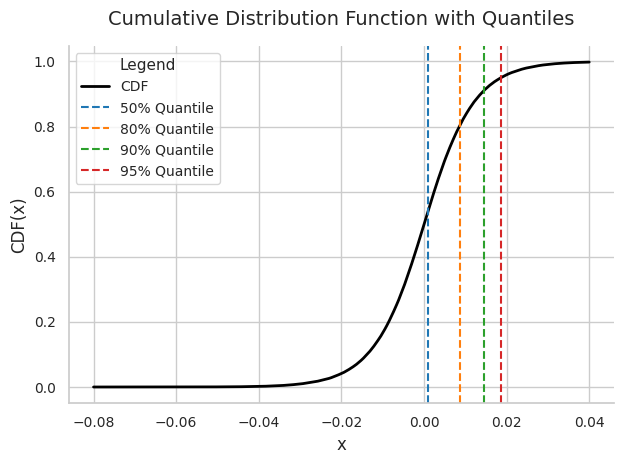

In [60]:
sns.set_theme(style="whitegrid")

# Create high-DPI figure for sharpness
fig, ax = plt.subplots()

# Plot CDF
ax.plot(ys, cdf_vals, label='CDF', color='black', linewidth=2)

# Vertical quantile lines
ax.axvline(quant50.root, linestyle='--', color='#1f77b4', label='50% Quantile')
ax.axvline(quant80.root, linestyle='--', color='#ff7f0e', label='80% Quantile')
ax.axvline(quant90.root, linestyle='--', color='#2ca02c', label='90% Quantile')
ax.axvline(quant95.root, linestyle='--', color='#d62728', label='95% Quantile')

# Labels and title
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("CDF(x)", fontsize=12)
ax.set_title("Cumulative Distribution Function with Quantiles", fontsize=14, pad=15)

ax.tick_params(axis='both', which='major', labelsize=10)
sns.despine()

ax.legend(title="Legend", fontsize=10, title_fontsize=11, loc="upper left", frameon=True)

plt.tight_layout()
plt.show()

## Part 2: Level of significance of Haar-like coordiantes of Guerrero Negro microbial mat dataset against 97% Greengenes tree

### Load 97% Greengenes tree

In [4]:
tree = pcms.tree.nwk2tree(os.path.join(GG_TREES, '97_otus.nwk'), ensure_planted=True)

In [5]:
leaves, depths = tree.find_leaves()
leaves = np.flip(leaves)

In [6]:
print(leaves)

[198588 198587 198579 ...      2      1      0]


In [7]:
n_leaves = tree.find_n_leaves()
print(n_leaves)

99322


In [8]:
seq_id2leaf_idx = utils.build_gg_seq_id2leaf_idx_map(tree)

### Load Guerrero Negro dataset

In [9]:
gn_table_filepath = os.path.join(GN_DATA, 'gg_13_8_97ref_97clust_filtered_table.tsv')
table_df = utils.load_gn_seq_id_abundances(gn_table_filepath)

# Exclude un-placed OTUs
table_df_placed = table_df.iloc[:4301].copy()

# Convert counts to proportions
cols = table_df_placed.columns[1:]
table_df_placed[cols] = table_df_placed[cols].div(table_df_placed[cols].sum(axis=0), axis=1)

# Append leaf index column
leaf_idxs = seq_id2leaf_idx[table_df_placed['OTU ID']].values
table_df_placed.loc[:, 'Leaf Index'] = leaf_idxs
table_df_placed.sort_values('Leaf Index', inplace=True, ignore_index=True)

In [10]:
print(table_df_placed)

       OTU ID     0-1mm     1-2mm     2-3mm     3-4mm     4-5mm     5-6mm  \
0     4067875  0.000000  0.000095  0.000188  0.000372  0.000000  0.000000   
1     3617745  0.000000  0.000000  0.000000  0.000000  0.000092  0.000000   
2     2773512  0.000103  0.000000  0.000000  0.000000  0.000000  0.000000   
3     3942288  0.000103  0.000095  0.000000  0.000093  0.000000  0.000000   
4     4361967  0.000103  0.000665  0.000094  0.000000  0.000092  0.000000   
...       ...       ...       ...       ...       ...       ...       ...   
4296  4478955  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4297  1549742  0.000000  0.000000  0.000000  0.000000  0.000000  0.000114   
4298  4436061  0.000000  0.000000  0.000000  0.000000  0.000000  0.000114   
4299  2517611  0.000000  0.000095  0.000094  0.000000  0.000000  0.000000   
4300  1636411  0.000000  0.000095  0.000000  0.000000  0.000000  0.000114   

        6-10mm   10-22mm   22-34mm   34-49mm  Leaf Index  
0     0.000000  

### Compute Haar-like coordinates

In [11]:
Q, S = pcms.haar.sparsify(tree)

In [12]:
diff_s = table_df_placed['34-49mm'] - table_df_placed['0-1mm']

mask = diff_s != 0

values = diff_s[mask].values
indices = table_df_placed['Leaf Index'][mask].values
indptr = [0, len(values)]

diff = csc_matrix((values, indices, indptr), shape=(n_leaves,1))

In [13]:
coords = (Q.T @ diff).tocsc()

In [14]:
dh_coords = coords.data**2 * S.diagonal()[coords.indices]
dh_indices = coords.indices[dh_coords != 0]
dh_coords = dh_coords[dh_coords != 0]

### Compute level of significance

#### Random topology CDF

#### Difference of Dirichlet CDF

In [15]:
pvals = np.zeros(coords.data.shape)
for i_idx, j_idx in enumerate(tree.find_interior_nodes()[coords.indices]):
    children = tree.find_children(j_idx)
    if children.size == 1:
        pvals[i_idx] = 1.0
    else:
        cdf_val = pcms.haar.cdf_proj_dirichlet_diff(
            coords.data[i_idx], 
            tree=tree,
            node=j_idx,
            eps=0.01,
            delta=0.01
        )
        pvals[i_idx] = 2 * min(cdf_val, 1 - cdf_val)

In [16]:
alpha = 0.05

In [22]:
do_reject = pvals < alpha

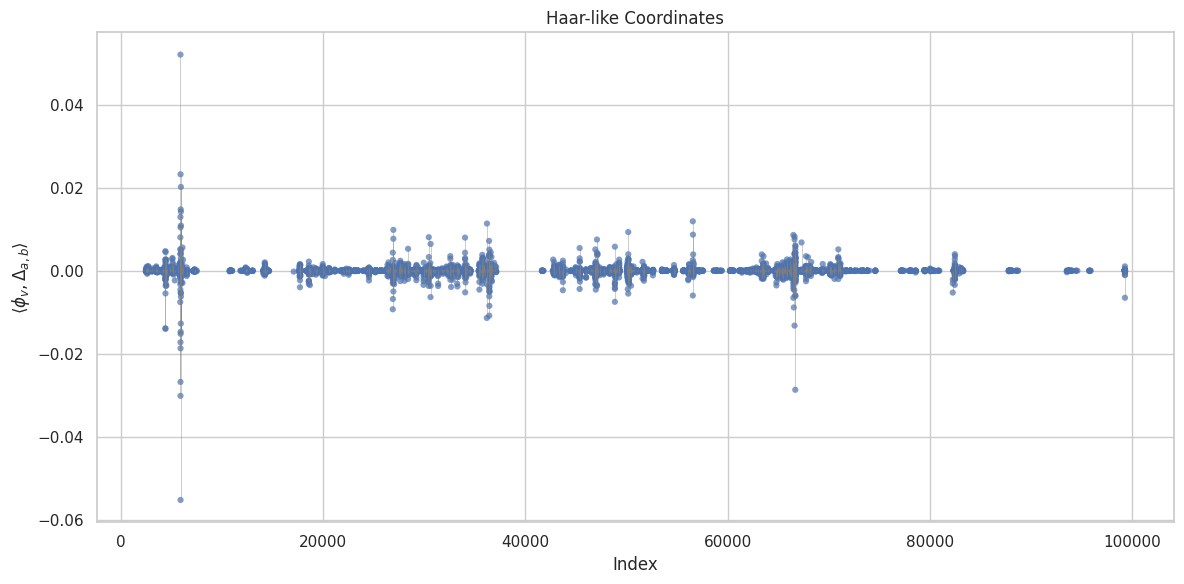

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Scatter points colored by pvals
sc = plt.scatter(
    coords.indices[:-1],
    coords.data[:-1],
    s=20,
    alpha=0.7,
    edgecolors='none'
)

# Draw vertical lines
plt.vlines(
    x=coords.indices,
    ymin=0,
    ymax=coords.data,
    colors='gray',
    alpha=0.4,
    linewidth=0.7
)

plt.xlabel('Index')
plt.ylabel(r'$\langle \phi_v, \Delta_{a,b} \rangle$')
plt.title('Haar-like Coordinates')
plt.tight_layout()
plt.show()

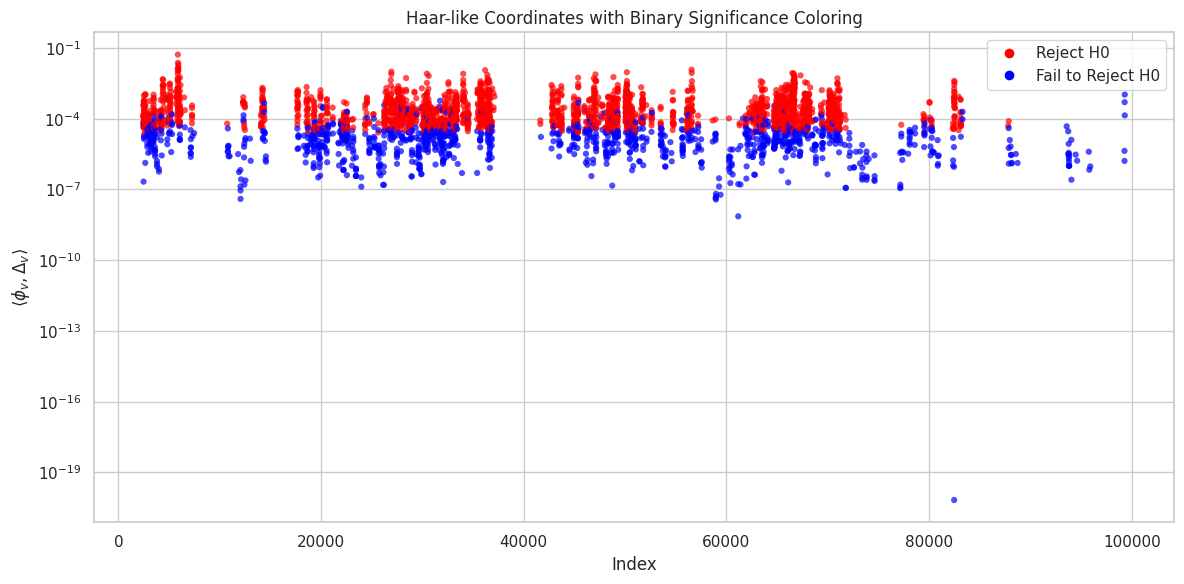

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Map do_reject to binary colors: rejected = red, not rejected = blue
colors = np.where(do_reject[:-1], 'red', 'blue')

# Scatter points with binary colors
sc = plt.scatter(
    coords.indices[:-1],
    coords.data[:-1],
    c=colors,
    s=20,
    alpha=0.7,
    edgecolors='none'
)

plt.yscale('log')

# Add custom legend for binary coloring
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Reject H0',
           markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Fail to Reject H0',
           markerfacecolor='blue', markersize=8)
]
plt.legend(handles=legend_elements)

plt.xlabel('Index')
plt.ylabel(r'$\langle \phi_v, \Delta_{v} \rangle$')
plt.title('Haar-like Coordinates with Binary Significance Coloring')
plt.tight_layout()
plt.show()

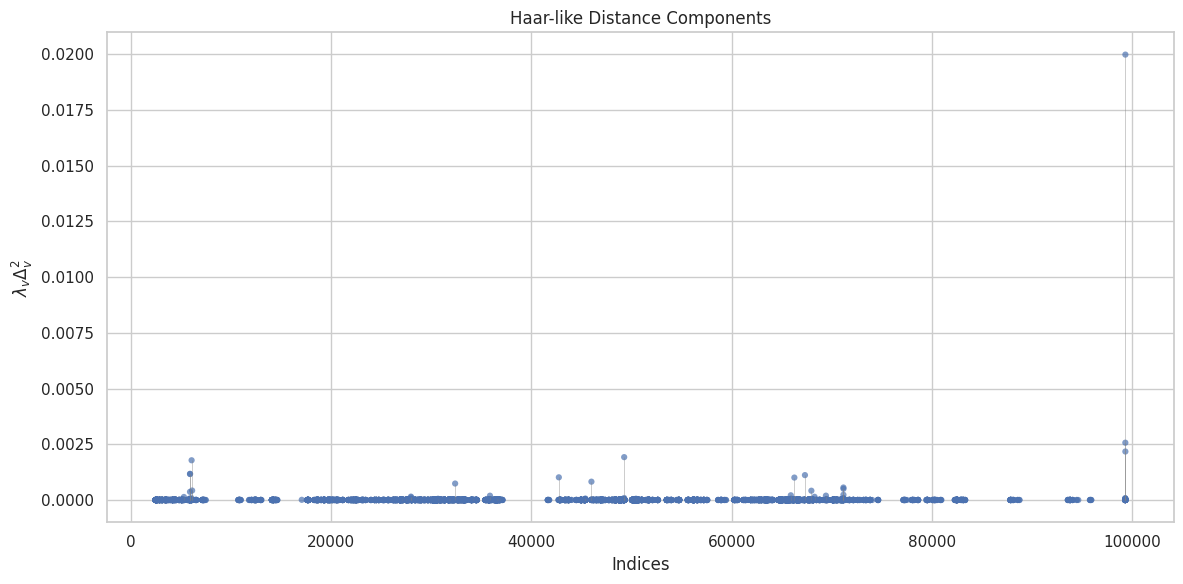

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Scatter points colored by pvals
sc = plt.scatter(
    dh_indices[:-1],
    dh_coords[:-1],
    s=20,
    alpha=0.7,
    edgecolors='none'
)

# Draw vertical lines from each point down to y=0
plt.vlines(
    x=dh_indices,
    ymin=0,
    ymax=dh_coords,
    colors='gray',
    alpha=0.4,
    linewidth=0.7
)

plt.xlabel('Indices')
plt.ylabel(r'$\lambda_v \Delta_v^2$')
plt.title('Haar-like Distance Components')
plt.tight_layout()
plt.show()

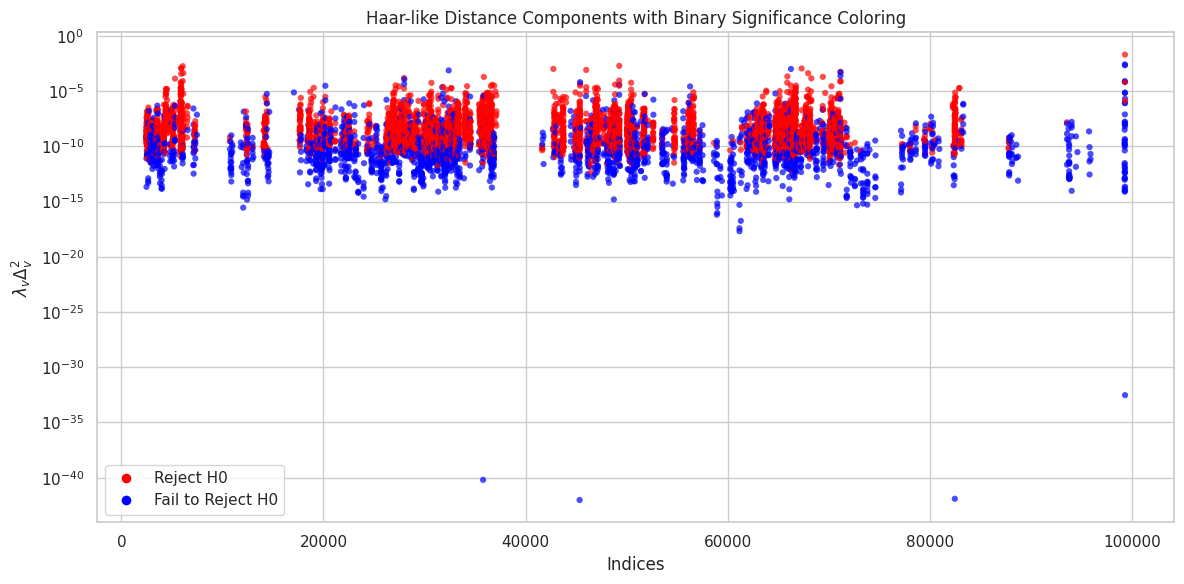

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Map do_reject to binary colors: rejected = red, not rejected = blue
colors = np.where(do_reject[:-1], 'red', 'blue')

# Scatter points with binary colors
sc = plt.scatter(
    dh_indices[:-1],
    dh_coords[:-1],
    c=colors,
    s=20,
    alpha=0.7,
    edgecolors='none'
)

plt.yscale('log')

# Add custom legend for binary coloring
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Reject H0',
           markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Fail to Reject H0',
           markerfacecolor='blue', markersize=8)
]
plt.legend(handles=legend_elements)

plt.xlabel('Indices')
plt.ylabel(r'$\lambda_v \Delta_v^2$')
plt.title('Haar-like Distance Components with Binary Significance Coloring')
plt.tight_layout()
plt.show()